In [1]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, CrossValidatorModel
from pyspark.ml.evaluation import RegressionEvaluator
from functools import reduce

In [2]:
df = spark.table('data_csv').withColumn('Date2', to_timestamp("Date"))

#split into train and test
w = Window().partitionBy(lit('a')).orderBy(lit('a'))
df_final = df.withColumn("row_num", row_number().over(w)/df.count())
train_df = df_final.where("row_num <= .75").drop("row_num")
test_df = df_final.where("row_num > .75").drop("row_num")

display(train_df)

Date,canada_cases,japan_cases,italy_cases,uk_cases,germany_cases,france_cases,canada_1lag,japan_1lag,italy_1lag,uk_1lag,germany_1lag,france_1lag,canada_2lag,japan_2lag,italy_2lag,uk_2lag,germany_2lag,france_2lag,canada_3lag,japan_3lag,italy_3lag,uk_3lag,germany_3lag,france_3lag,canada_ma,japan_ma,italy_ma,uk_ma,germany_ma,france_ma,canada_pt,japan_pt,italy_pt,uk_pt,germany_pt,france_pt,dow,Canada_Outdoor_Mobility,Canada_indoorMobility,Germany_Outdoor_Mobility,Germany_indoorMobility,France_Outdoor_Mobility,France_indoorMobility,Japan_Outdoor_Mobility,Japan_indoorMobility,Italy_Outdoor_Mobility,Italy_indoorMobility,United_Kingdom_Outdoor_Mobility,United_Kingdom_indoorMobility,temp_canada,temp_uk,temp_italy,temp_japan,temp_germany,temp_france,Date2
2020-02-15T00:00:00.000+0000,0,14,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0.0,2.5714285714285716,0.0,0.8571428571428571,0.42857142857142855,0.14285714285714285,-1.1218858477621303,-0.7954695857762899,-1.1716774982661629,-1.1086165292842407,-1.0749615314411505,-1.015342926505512,7,14,0,25,-1,15,-1,18,0,33,-1,7,2,19.262200956937807,43.473076923076924,42.971153846153854,36.91923076923077,34.547999999999995,47.35,2020-02-15T00:00:00.000+0000
2020-02-16T00:00:00.000+0000,0,16,0,0,0,0,0,14,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0.0,4.714285714285714,0.0,0.8571428571428571,0.2857142857142857,0.14285714285714285,-1.1218858477621303,-0.753735494926352,-1.1716774982661629,-1.1086165292842407,-1.0749615314411505,-1.017298777731317,1,8,-2,7,0,-2,-1,2,2,21,-2,-3,1,19.704784688995215,43.27307692307693,43.607692307692304,36.20897435897436,36.21176470588236,47.7,2020-02-16T00:00:00.000+0000
2020-02-17T00:00:00.000+0000,1,7,0,0,0,0,0,16,0,0,0,0,0,14,0,0,0,1,0,1,0,0,0,0,0.14285714285714285,5.714285714285714,0.0,0.14285714285714285,0.2857142857142857,0.14285714285714285,-1.1194942519526727,-0.947766221046188,-1.1716774982661629,-1.1086165292842407,-1.0749615314411505,-1.017298777731317,2,-9,11,14,0,1,4,7,1,10,0,13,2,20.393749999999997,43.20192307692308,44.28461538461538,36.44102564102563,34.41666666666667,49.900000000000006,2020-02-17T00:00:00.000+0000
2020-02-18T00:00:00.000+0000,0,8,0,0,0,0,1,7,0,0,0,0,0,16,0,0,0,0,0,14,0,0,0,1,0.14285714285714285,6.857142857142857,0.0,0.14285714285714285,0.0,0.14285714285714285,-1.1218858477621303,-0.9253994615186594,-1.1716774982661629,-1.1086165292842407,-1.0749615314411505,-1.017298777731317,3,5,1,12,1,5,3,8,1,13,0,12,2,21.082692307692312,42.723076923076924,44.07307692307692,35.506493506493506,34.573076923076904,49.35,2020-02-18T00:00:00.000+0000
2020-02-19T00:00:00.000+0000,0,10,0,0,0,0,0,8,0,0,0,0,1,7,0,0,0,0,0,16,0,0,0,0,0.14285714285714285,8.0,0.0,0.0,0.0,0.14285714285714285,-1.1218858477621303,-0.8812847035141453,-1.1716774982661629,-1.1086165292842407,-1.0749615314411505,-1.017298777731317,4,6,0,9,1,1,2,9,0,13,0,13,3,22.175119617224876,43.030769230769224,43.90576923076923,36.780769230769224,35.49555555555555,47.45,2020-02-19T00:00:00.000+0000
2020-02-20T00:00:00.000+0000,0,10,0,0,0,0,0,10,0,0,0,0,0,8,0,0,0,0,1,7,0,0,0,0,0.14285714285714285,9.428571428571429,0.0,0.0,0.0,0.14285714285714285,-1.1218858477621303,-0.8812847035141453,-1.1716774982661629,-1.1086165292842407,-1.0749615314411505,-1.017298777731317,5,10,0,12,1,4,3,11,0,17,0,10,3,22.630769230769236,43.14615384615383,43.59423076923076,37.666666666666664,36.678431372549014,46.2,2020-02-20T00:00:00.000+0000
2020-02-21T00:00:00.000+0000,1,11,17,0,0,0,0,10,0,0,0,0,0,10,0,0,0,0,0,8,0,0,0,0,0.2857142857142857,10.857142857142858,2.4285714285714284,0.0,0.0,0.14285714285714285,-1.1194942519526727,-0.8595323341813708,-1.1480623566083197,-1.1086165292842407,-1.0749615314411505,-1.017298777731317,6,17,1,18,2,10,3,21,1,23,-1,17,3,22.80769230769232,43.59423076923077,44.23461538461539,36.84743589743589,36.290196078431364,49.0,2020-02-21T00:00:00.000+0000
2020-02-22T00:00:00.000+0000,0,17,42,0,0,0,1,11,17,0,0,0,0,10,0,0,0,0,0,10,0,0,0,0,0.2857142857142857,11.285714285714286,8.428571428571429,0.0,0.0,0.0,-1.1218858477621303

In [3]:
OriginalFeatures = ['canada_cases','japan_cases','italy_cases','uk_cases','germany_cases','france_cases','canada_ma','japan_ma','italy_ma','uk_ma','germany_ma',
'france_ma','canada_pt','japan_pt','italy_pt','uk_pt','germany_pt','france_pt','dow', 'canada_1lag','japan_1lag','italy_1lag','uk_1lag', 'germany_1lag','france_1lag','canada_2lag','japan_2lag','italy_2lag','uk_2lag','germany_2lag','france_2lag','canada_3lag','japan_3lag',
'italy_3lag','uk_3lag','germany_3lag','france_3lag']

ExternalFeatures = ['canada_cases','japan_cases','italy_cases','uk_cases','germany_cases','france_cases','canada_ma','japan_ma','italy_ma','uk_ma','germany_ma',
'france_ma','canada_pt','japan_pt','italy_pt','uk_pt','germany_pt','france_pt','dow','Canada_Outdoor_Mobility','Canada_indoorMobility',
'Germany_Outdoor_Mobility','Germany_indoorMobility','France_Outdoor_Mobility','France_indoorMobility','Japan_Outdoor_Mobility',
'Japan_indoorMobility','Italy_Outdoor_Mobility','Italy_indoorMobility','United_Kingdom_Outdoor_Mobility','United_Kingdom_indoorMobility', 'temp_canada','temp_uk','temp_italy','temp_japan','temp_germany','temp_france', 'canada_1lag','japan_1lag','italy_1lag','uk_1lag', 'germany_1lag','france_1lag','canada_2lag','japan_2lag','italy_2lag','uk_2lag','germany_2lag','france_2lag','canada_3lag','japan_3lag',
'italy_3lag','uk_3lag','germany_3lag','france_3lag']

In [4]:
import numpy as np
from multiprocessing.pool import ThreadPool
from pyspark.ml.tuning import _parallelFitTasks


class RollingKFoldCV(CrossValidator):
    """
    Modified CrossValidator to allow rolling k-fold cross validation using an increasing window. 
    Aimed to prevent data leakage associated with time series data (can't predict past using future data).
    """
        
    def _fit(self, dataset):
        est = self.getOrDefault(self.estimator)
        epm = self.getOrDefault(self.estimatorParamMaps)
        numModels = len(epm)
        eva = self.getOrDefault(self.evaluator)
        nFolds = self.getOrDefault(self.numFolds)
        seed = self.getOrDefault(self.seed)
        metrics = [0.0] * numModels

        # Use rolling window instead of random folds
        rowNumCol = self.uid + "_rownum"
        w = Window().orderBy(lit('A')) # Dummy window to create row number
        df = dataset.select("*", row_number().over(w).alias(rowNumCol))
        h = df.count()/(nFolds+1)

        pool = ThreadPool(processes=self.getParallelism())
        subModels = None
        collectSubModelsParam = self.getCollectSubModels()
        if collectSubModelsParam:
            subModels = [[None for j in range(numModels)] for i in range(nFolds)]

        for i in range(nFolds):
            # Get rolling (increasing) window
            validateLB = (i + 1) * h
            validateUB = (i + 2) * h
            validation = df.filter((df[rowNumCol] >= validateLB) & (df[rowNumCol] < validateUB)).cache()
            train = df.filter(df[rowNumCol] < validateLB).cache()

            tasks = _parallelFitTasks(est, train, eva, validation, epm, collectSubModelsParam)
            for j, metric, subModel in pool.imap_unordered(lambda f: f(), tasks):
                metrics[j] += (metric / nFolds)
                if collectSubModelsParam:
                    subModels[i][j] = subModel

            validation.unpersist()
            train.unpersist()

        if eva.isLargerBetter():
            bestIndex = np.argmax(metrics)
        else:
            bestIndex = np.argmin(metrics)
        bestModel = est.fit(dataset, epm[bestIndex])
        return self._copyValues(CrossValidatorModel(bestModel, metrics, subModels))

In [5]:
def pipeline (train_df, test_df, features, target):
   # remove target from features
  fea = [s for s in features if s!=target]
  vectorAssembler = VectorAssembler(inputCols = fea, outputCol = 'features')
  
  # define model 
  decisionTree = DecisionTreeRegressor(featuresCol='features', labelCol=target) 

  # define pipeline
  pipeline = Pipeline(stages=[vectorAssembler, decisionTree])
  
  # define parameters for cross validation
  paramGrid = ParamGridBuilder() \
    .addGrid(decisionTree.maxBins, [20, 40, 80, 100]) \
    .addGrid(decisionTree.maxDepth, [5, 10, 20, 30]) \
    .build()
  
  #define evaluator 
  evaluator = RegressionEvaluator(predictionCol="prediction", labelCol=target, metricName = 'rmse')
  
  # build model
  crossval = RollingKFoldCV (estimator=pipeline,\
                          estimatorParamMaps=paramGrid,\
                          evaluator=evaluator,\
                          numFolds=2)
  # fit train data
  model = crossval.fit(train_df)
  
  # predict of test data
  prediction = model.transform(test_df)  
  return model, prediction

In [6]:
# define smape and rmse function
def metric(prediction, target):
  w = Window().partitionBy(lit('a')).orderBy(lit('a'))
  
  i = [1,7,14,30] # horizons 
  data = [] # metrics data list
  for j in range(0,4):
    horizon = i[j]
    df_p = prediction.withColumn("row_num", row_number().over(w))
    p = df_p.filter(col('row_num')%horizon==0).drop('row_num')
  
    s = p.select((mean(abs(col('prediction')-col(target))/\
                              ((abs(col(target))+abs(col('prediction')))))*100).alias('smape'))
    r = p.select((sqrt(avg(pow(col('prediction')-col(target),2)))).alias('rmse'))
    
    m = (horizon, str(s.collect()[0].smape), str(r.collect()[0].rmse)) 
    data.append(m)
  return data

In [7]:
def plot(country, prediction):
  target = country+'_cases'
  pred = prediction.withColumn('date_str', date_format(col("Date2"), "yyyy-MM-dd"))
  plot = (pred.select('date_str', target, 'prediction')).toPandas()

  plt.figure(figsize=(8,5))  
  x = plot['date_str'].values
  y1 = plot[target].values
  y2 = plot['prediction'].values
  plt.plot(x,y1, color = 'red')
  plt.plot(x,y2, color = 'black')
  plt.xticks(x[::3], rotation=45, ha='right')
  plt.title('Predicted Vs Actual Number of Cases in ' + country, fontsize=20)
  plt.xlabel('Date', fontsize=15)
  plt.ylabel('Number of Cases', fontsize=15)
  plt.legend(['Actual Cases', 'Predicted Cases'])
  plt.show()

In [8]:
model, prediction = pipeline(train_df, test_df, OriginalFeatures, 'canada_cases')
params = model.bestModel.stages[-1].extractParamMap()
{p[0].name: p[1] for p in params.items()}

Out[95]: {'featuresCol': 'features',
 'labelCol': 'canada_cases',
 'predictionCol': 'prediction',
 'seed': -1407754390808368278,
 'cacheNodeIds': False,
 'checkpointInterval': 10,
 'impurity': 'variance',
 'leafCol': '',
 'maxBins': 40,
 'maxDepth': 10,
 'maxMemoryInMB': 256,
 'minInfoGain': 0.0,
 'minInstancesPerNode': 1,
 'minWeightFractionPerNode': 0.0}

In [9]:
data = metric(prediction, 'canada_cases')
# create a metrics dataframe
schema = StructType([StructField('Day', StringType(), True),\
                     StructField('smape', StringType(), True),\
                     StructField('rmse', StringType(), True)])
metrics = spark.createDataFrame(sc.parallelize(data), schema)
metrics.show()

+---+------------------+-----------------+
Day| smape| rmse|
+---+------------------+-----------------+
 1|23.867910665731973|285.5568828330589|
 7|26.622282560876144|307.9334343652862|
 14| 51.5498187449407|433.8594242378515|
 30| 88.58267716535433| 450.0|
+---+------------------+-----------------+

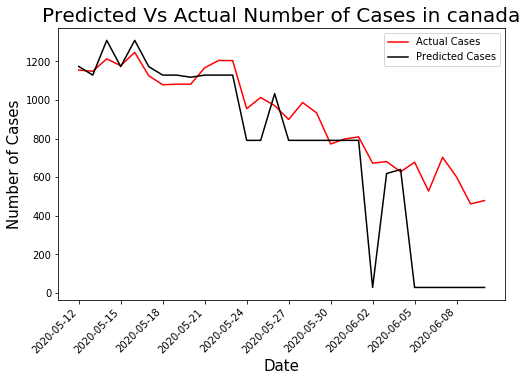

In [10]:
plot('canada', prediction)

In [11]:
model, prediction_extended = pipeline(train_df, test_df, ExternalFeatures, 'canada_cases')
params = model.bestModel.stages[-1].extractParamMap()
{p[0].name: p[1] for p in params.items()}

Out[98]: {'featuresCol': 'features',
 'labelCol': 'canada_cases',
 'predictionCol': 'prediction',
 'seed': -1407754390808368278,
 'cacheNodeIds': False,
 'checkpointInterval': 10,
 'impurity': 'variance',
 'leafCol': '',
 'maxBins': 40,
 'maxDepth': 10,
 'maxMemoryInMB': 256,
 'minInfoGain': 0.0,
 'minInstancesPerNode': 1,
 'minWeightFractionPerNode': 0.0}

In [12]:
data = metric(prediction_extended, 'canada_cases')
# create a metrics dataframe
schema = StructType([StructField('Day', StringType(), True),\
                     StructField('smape', StringType(), True),\
                     StructField('rmse', StringType(), True)])
metrics_extended = spark.createDataFrame(sc.parallelize(data), schema)
metrics_extended.show()

+---+------------------+-----------------+
Day| smape| rmse|
+---+------------------+-----------------+
 1|23.867910665731973|285.5568828330589|
 7|26.622282560876144|307.9334343652862|
 14| 51.5498187449407|433.8594242378515|
 30| 88.58267716535433| 450.0|
+---+------------------+-----------------+

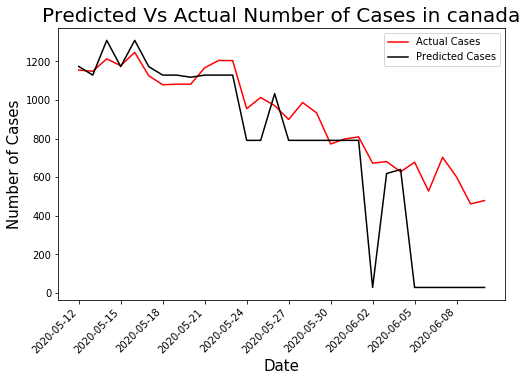

In [13]:
plot('canada', prediction_extended)

In [14]:
# Since the extended features did not impact the 
model, prediction = pipeline(train_df, test_df, ExternalFeatures, 'japan_cases')
params_japan = model.bestModel.stages[-1].extractParamMap()
data = metric(prediction, 'japan_cases')
# create a metrics dataframe
schema = StructType([StructField('Day', StringType(), True),\
                     StructField('smape', StringType(), True),\
                     StructField('rmse', StringType(), True)])
metrics = spark.createDataFrame(sc.parallelize(data), schema)
metrics.show()

+---+------------------+------------------+
Day| smape| rmse|
+---+------------------+------------------+
 1|6.1165094339267085| 7.164728420068226|
 7| 6.977605727605727| 5.049752469181039|
 14| 5.53030303030303|3.1622776601683795|
 30|12.903225806451612| 8.0|
+---+------------------+------------------+

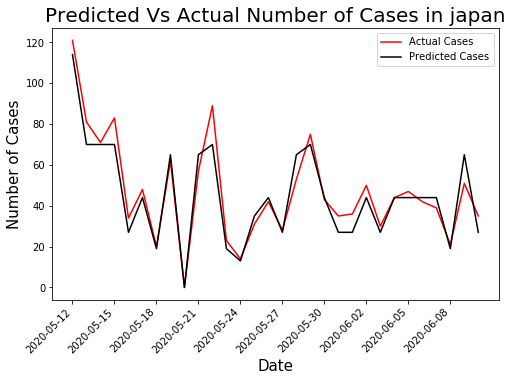

In [15]:
plot('japan', prediction)

In [16]:
model, prediction = pipeline(train_df, test_df, ExternalFeatures, 'italy_cases')
params_italy = model.bestModel.stages[-1].extractParamMap()
data = metric(prediction, 'italy_cases')
# create a metrics dataframe
schema = StructType([StructField('Day', StringType(), True),\
                     StructField('smape', StringType(), True),\
                     StructField('rmse', StringType(), True)])
metrics = spark.createDataFrame(sc.parallelize(data), schema)
metrics.show()

+---+------------------+-----------------+
Day| smape| rmse|
+---+------------------+-----------------+
 1| 25.98114173362375|338.7837560057054|
 7|43.842849252428174|479.0284438318877|
 14| 45.38636411923428|484.5719760778578|
 30| 47.39583333333333| 364.0|
+---+------------------+-----------------+

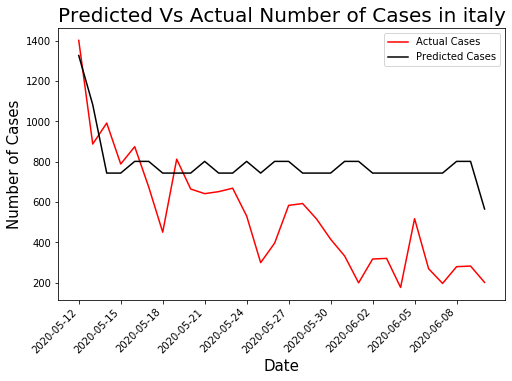

In [17]:
plot('italy', prediction)

In [18]:
model, prediction = pipeline(train_df, test_df, ExternalFeatures, 'germany_cases')
params_germany = model.bestModel.stages[-1].extractParamMap()

data = metric(prediction, 'germany_cases')
# create a metrics dataframe
schema = StructType([StructField('Day', StringType(), True),\
                     StructField('smape', StringType(), True),\
                     StructField('rmse', StringType(), True)])
metrics = spark.createDataFrame(sc.parallelize(data), schema)
metrics.show()


+---+------------------+------------------+
Day| smape| rmse|
+---+------------------+------------------+
 1| 23.60729373545294|253.24682916372612|
 7| 39.11945857666142| 314.3544973433655|
 14|27.832136932150426|243.41836413878062|
 30| 94.39579684763572| 539.0|
+---+------------------+------------------+

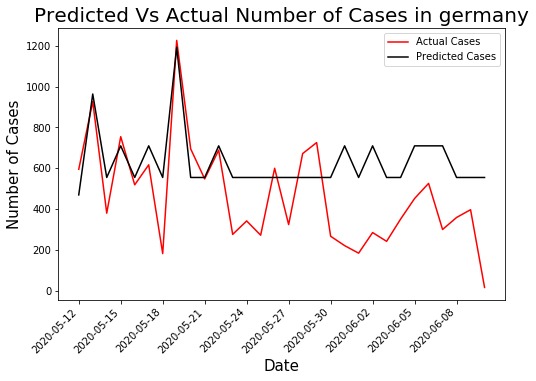

In [19]:
plot('germany', prediction)

In [20]:
model, prediction = pipeline(train_df, test_df, ExternalFeatures, 'france_cases')
params_france = model.bestModel.stages[-1].extractParamMap()

data = metric(prediction, 'france_cases')
# create a metrics dataframe
schema = StructType([StructField('Day', StringType(), True),\
                     StructField('smape', StringType(), True),\
                     StructField('rmse', StringType(), True)])
metrics = spark.createDataFrame(sc.parallelize(data), schema)
metrics.show()

+---+-----------------+------------------+
Day| smape| rmse|
+---+-----------------+------------------+
 1|10.26953068025974|128.09484260269036|
 7|5.365933496396822|27.704354350895816|
 14|5.461552540068502|25.449091339377915|
 30|5.812574139976276| 49.0|
+---+-----------------+------------------+

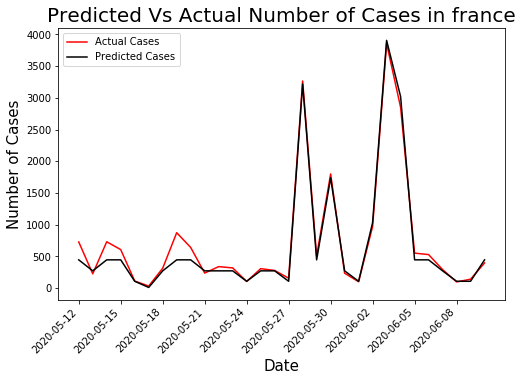

In [21]:
plot('france', prediction)

In [22]:
model, prediction = pipeline(train_df, test_df, ExternalFeatures, 'uk_cases')
params_uk = model.bestModel.stages[-1].extractParamMap()

data = metric(prediction, 'uk_cases')
# create a metrics dataframe
schema = StructType([StructField('Day', StringType(), True),\
                     StructField('smape', StringType(), True),\
                     StructField('rmse', StringType(), True)])
metrics = spark.createDataFrame(sc.parallelize(data), schema)
metrics.show()

+---+------------------+------------------+
Day| smape| rmse|
+---+------------------+------------------+
 1|21.009652725858814| 834.7392806539457|
 7|21.502241381710885| 941.3066716007063|
 14|16.910226462531426|491.04378623499554|
 30|1.5701668302257115| 32.0|
+---+------------------+------------------+

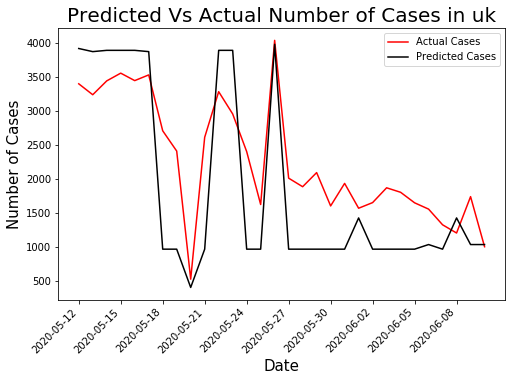

In [23]:
plot('uk', prediction)